# [Training a Neural Network with PyTorch](https://campus.datacamp.com/courses/introduction-to-deep-learning-with-pytorch/training-a-neural-network-with-pytorch?ex=1)

Third chapter in the Introduction to Deep Learning with PyTorch DataCamp course.

## 1 - A Deeper Dive Into Loading Data

Use  `TensorDataset` to prepare data for PyTorch models, storign features (X) and labels (y) as tensors, making them esay to manage.

In [1]:
import torch
from torch.utils.data import TensorDataset
import numpy as np

# Features: 4 x 3 matrix
# Four individuals, and 3 features
inputs = np.array([
    [0.5, 3.4, 6.7],
    [1.2, 5.0, 7.3],
    [34.2, 44.0, 12.3],
    [0.4, 6.7, 2.2]
])
print(inputs, '\n')

# Labels: 4 x 1 matrix
# 0 = specie one
# 1 = specie two
labels = np.array([
    0, 0, 1, 0
])
print(labels)

[[ 0.5  3.4  6.7]
 [ 1.2  5.   7.3]
 [34.2 44.  12.3]
 [ 0.4  6.7  2.2]] 

[0 0 1 0]


In [2]:
# Instantiate dataset class
dataset = TensorDataset(
    torch.tensor(inputs),
    torch.tensor(labels)
)

# Access an individual sample: square bracket indexing:
input_sample, label_sample = dataset[0]
print(f"""
    Input sample: {input_sample} \n
    Label sample: {label_sample}
"""
)


    Input sample: tensor([0.5000, 3.4000, 6.7000], dtype=torch.float64) 

    Label sample: 0



* After to create the dataset using `TensorDataset` function, use the `DataLoader` function to manage data loading during training.

* Since deep learning models require large datasets, batching helps process multiple samples at once, making training more efficient.

* Shuffle randomizes the data order at each epoch, hepling improve model generalization.

* **Epoch**: one full pass through the traning dataloader.

In [3]:
from torch.utils.data import DataLoader

# Define batch size
# Determines how many samples are included in each iteration.
batch_size = 2

# Define shuffle:
# Randomize the data order at each epoch
shuffle = True

# Create a DataLoader:
# Easy to iterate through the dataset in batches
dataloader = DataLoader(
    dataset=dataset,
    batch_size=batch_size,
    shuffle=True
)

# Iterate over the dataloader
for batch_inputs, batch_labels in dataloader:
    print('Batch inputs: \n', batch_inputs)
    print('Batch labels: \n', batch_labels, '\n')

Batch inputs: 
 tensor([[ 0.4000,  6.7000,  2.2000],
        [34.2000, 44.0000, 12.3000]], dtype=torch.float64)
Batch labels: 
 tensor([0, 1]) 

Batch inputs: 
 tensor([[1.2000, 5.0000, 7.3000],
        [0.5000, 3.4000, 6.7000]], dtype=torch.float64)
Batch labels: 
 tensor([0, 0]) 



* In real world deep learning, datasets are much larger, with batch sizes of typically 32 or more for better computational efficiency.

* The `DataLoader` class is essential for efficiently handling large datasets. It speeds up training, optimizes memory usage and stabilizes gradient updates, making deep learnig models more effective.

## 2 - Writing a First Training Loop 

Training a neural network requires:
- 1. Create a model
- 2. Choose a loss function
- 3. Define a dataset
- 4. Set an optimizer
- 5. Run a training loop
    - 5.1. Calculate loss (forward pass)
    - 5.2. Compute gradients (backpropagation)
    - 5.3. Update model parameters

### 2.1 - Binary Classification Example

In [4]:
import torch.nn as nn
from torch.nn import CrossEntropyLoss
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

# 0) Inputs and labels
inputs = np.array([
    [0.5, 3.4, 6.7],
    [1.2, 5.0, 7.3],
    [34.2, 44.0, 12.3],
    [0.4, 6.7, 2.2]
])

# 0 = specie one
# 1 = specie two
labels = np.array([
    0, 0, 1, 0
])

# 1) Create a model
model = nn.Sequential(
    nn.Linear(3, 5),
    nn.Linear(5, 5),
    nn.Linear(5, 2)
)

# 2) Choose a loss function
criterion = CrossEntropyLoss()

# 3) Define a dataset
dataset = TensorDataset(
    torch.tensor(inputs).float(),
    torch.tensor(labels).long()
)

dataloader = DataLoader(
    dataset=dataset,
    batch_size=2,
    shuffle=True
)

# 4) Set an optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)

Looping through the entire dataset once is called an epoch and we train over multiple epoch (num_epochs parameter)

In [5]:
# 5) Training loop
num_epochs = 5

for epoch in range(num_epochs): # For each epoch, we loop throug the dataloader
    
    for data in dataloader: # Each iteration of the dataloader provides a batch of samples
        
        # Set the gradients to zero because the optimizer stores gradientes from previous steps by default
        optimizer.zero_grad()

        # Get feature an targe from the dataloader
        feature, target = data

        # Run a forward pass
        pred = model(feature)

        # Compute loss and gradients
        loss = criterion(pred, target)
        loss.backward()

        # Update the parameters
        optimizer.step()

### 2.2 - Regression Example

In [6]:
import torch.nn as nn
from torch.nn import MSELoss
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

# Inputs
reg_inputs = np.array([
    [0.5, 3.4, 6.7],
    [1.2, 5.0, 7.3],
    [34.2, 44.0, 12.3],
    [0.4, 6.7, 2.2]
])

# Labels
reg_labels = np.array([1.3, 4.5, 3.4, 2.2])

# 1) Create a model
model = nn.Sequential(
    nn.Linear(3, 5),
    nn.Linear(5, 1),
)

# 2) Choose a loss function
criterion = MSELoss()

# 3) Define a dataset
dataset = TensorDataset(
    torch.tensor(reg_inputs).float(),
    torch.tensor(reg_labels).float()
)

dataloader = DataLoader(
    dataset=dataset,
    batch_size=2,
    shuffle=True
)

# 4) Set an optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)

# 5) Training loop
num_epochs = 5

for epoch in range(num_epochs): # For each epoch, we loop throug the dataloader
    print(f'Epoch: {epoch}')

    for data in dataloader: # Each iteration of the dataloader provides a batch of samples
        # Set the gradients to zero because the optimizer stores gradientes from previous steps by default
        optimizer.zero_grad()

        # Get feature an targe from the dataloader
        feature, target = data

        # Run a forward pass
        pred = model(feature)
        print(pred, pred.shape)
        print(target, target.shape)

        # Compute loss and gradients
        loss = criterion(pred, target.unsqueeze(1))
        print(loss, '\n')
        loss.backward()

        # Update the parameters
        optimizer.step()

Epoch: 0
tensor([[-2.8044],
        [-2.1518]], grad_fn=<AddmmBackward0>) torch.Size([2, 1])
tensor([4.5000, 1.3000]) torch.Size([2])
tensor(32.6348, grad_fn=<MseLossBackward0>) 

tensor([[-13.4954],
        [ -1.8164]], grad_fn=<AddmmBackward0>) torch.Size([2, 1])
tensor([3.4000, 2.2000]) torch.Size([2])
tensor(150.7938, grad_fn=<MseLossBackward0>) 

Epoch: 1
tensor([[4.8996],
        [5.0003]], grad_fn=<AddmmBackward0>) torch.Size([2, 1])
tensor([2.2000, 4.5000]) torch.Size([2])
tensor(3.7690, grad_fn=<MseLossBackward0>) 

tensor([[ 3.1106],
        [54.3389]], grad_fn=<AddmmBackward0>) torch.Size([2, 1])
tensor([1.3000, 3.4000]) torch.Size([2])
tensor(1299.0267, grad_fn=<MseLossBackward0>) 

Epoch: 2
tensor([[ 23.6928],
        [199.1276]], grad_fn=<AddmmBackward0>) torch.Size([2, 1])
tensor([4.5000, 3.4000]) torch.Size([2])
tensor(19338.8262, grad_fn=<MseLossBackward0>) 

tensor([[1626.6077],
        [2172.0486]], grad_fn=<AddmmBackward0>) torch.Size([2, 1])
tensor([1.3000, 2.2000]

## 3 - ReLU Activation Functions

* Activation functions introduce non-linearity to helps neural networks learn complex patterns.

* Sigmoid and Softmax activation functions limit outputs between 0 and 1. 

* While the Sigmoid can technically be used anywhere in a network, Softmax is typically reserved for the final output layer in a multi-class classification task.

* In Sigmoid and Softmax the gradients are very small for large positive and negative input values ($x$), which causes the activation to **saturate**. When these gradients are extremely small, they fail to update the network's weights effectively. This issue is known as the **vanishing gradients problem**, which makes the training process very difficult.

* **ReLU**: Rectified Linear Unit, $f(x) = max(x, 0)$

* **Leaky ReLU**: Variation of ReLu wher negatives inputs are scaled by a small coefficient (default 0.001 in PyTorch).

In [13]:
relu = nn.ReLU()
leakyrelu = nn.LeakyReLU(negative_slope=0.05)
print(leakyrelu(torch.tensor([-3.0])))

tensor([-0.1500])


## 4 -  Learning Rate and Momemtum

* Training a neural network = solving an optimization problem, e.i. by minimizing the loss function and adjusting model parameters

* Stochastic Gradient Descent (SGD) optimizer.

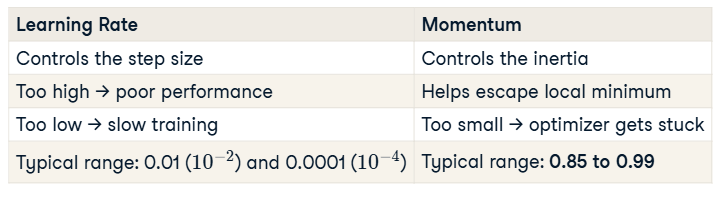

* Momentum and learning rate are critical to the training of your neural network. A good rule of thumb is to start with a learning rate of 0.001 and a momentum of 0.95.